# EEG Processing Exploration
# Interactive exploration of EEG processing pipeline stages

In [1]:
# Initial imports
from src.eeg_processor.pipeline import EEGPipeline

In [2]:
# Initialize processor
pipeline = EEGPipeline()

## Load Raw Data

Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 2005399  =      0.000 ...  2005.399 secs...
Event file found. Extracting Annotations from C:\Users\sayee\Documents\Research\PythonCode\EEG_Processor\tests\test_data\curry\S_010_M.ceo...


2025-05-30 10:33:43.676 | INFO     | src.eeg_processor.file_io.curry:_auto_correct_montage:47 - Corrected 180° coordinate rotation


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 64 EEG, 2 EOG, 1 misc
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2024-05-08 11:02:23 UTC
 nchan: 67
 projs: []
 sfreq: 1000.0 Hz
>


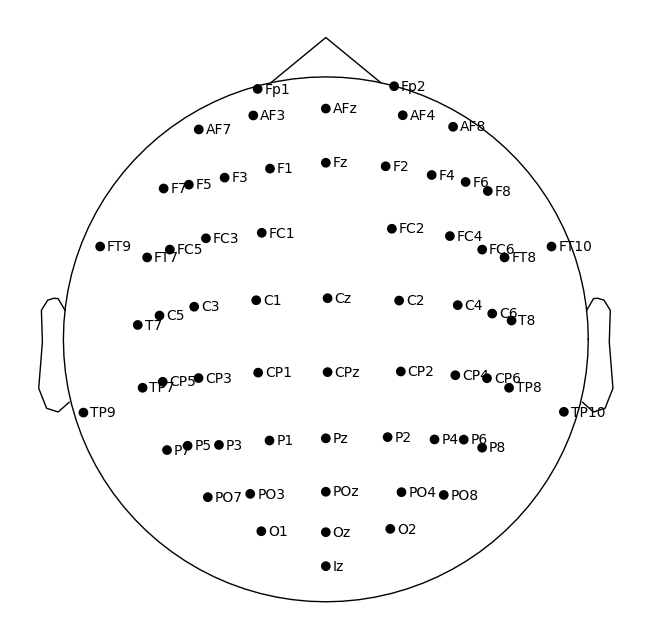

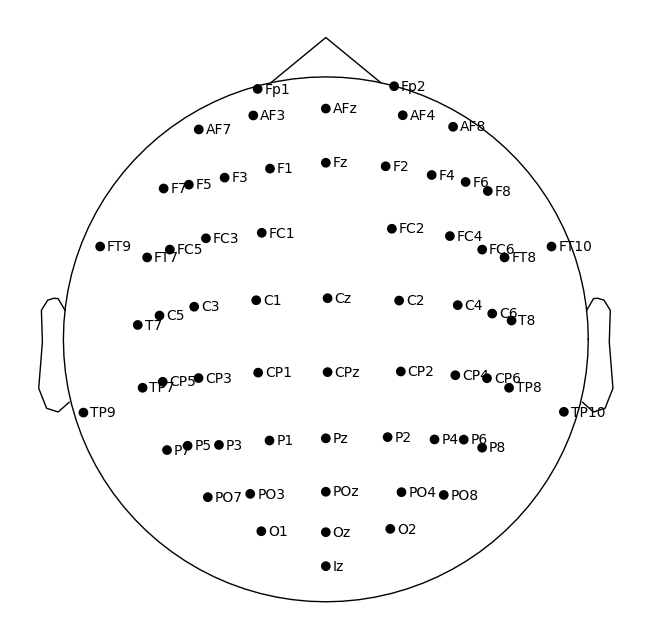

In [3]:
# Direct file loading (alternative if participant handler isn't working)
raw_data_path = 'C:/Users/sayee/Documents/Research/PythonCode/EEG_Processor/tests/test_data/curry/'
participant_file = 'S_010_M.dat'

raw = pipeline.load_raw(raw_data_path + participant_file)
print(raw.info)
raw.plot_sensors(show_names=True)


<span style="color:red;"> # The VEOG and HEOG shouldn't be in the headplot montage, we need to fix this </span>

### Cropping Stage

In [4]:
crop_params = {
    'crop_after': 30,
    'crop_before': 39,
}
condition = {'name': "Inhibition Level",
             'epoch_events': {"Onset": 31,  "Offset": 32},  # Trigger codes marking this condition
             'condition_markers': [30, 39]}  # Tuple: [start, end] event codes (optional)
pipeline.processor.current_condition = condition
cond3 = pipeline.apply_stage(raw, "crop", **crop_params)
cond3.plot() # applying a stage modifies the raw object directly

Used Annotations descriptions: [np.str_('10'), np.str_('11'), np.str_('12'), np.str_('143'), np.str_('19'), np.str_('20'), np.str_('21'), np.str_('22'), np.str_('223'), np.str_('255'), np.str_('29'), np.str_('30'), np.str_('31'), np.str_('32'), np.str_('39'), np.str_('40'), np.str_('49')]
Used Annotations descriptions: [np.str_('10'), np.str_('11'), np.str_('12'), np.str_('143'), np.str_('19'), np.str_('20'), np.str_('21'), np.str_('22'), np.str_('223'), np.str_('255'), np.str_('29'), np.str_('30'), np.str_('31'), np.str_('32'), np.str_('39'), np.str_('40'), np.str_('49')]
Using qt as 2D backend.


### Attempt to fix bad events

In [5]:
correct_params = {
    'method': 'alternating',
}

corrected = pipeline.apply_stage(cond3, "correct_triggers", **correct_params) # applying a stage modifies the raw object directly
corrected.plot()

Used Annotations descriptions: [np.str_('223'), np.str_('255'), np.str_('30'), np.str_('31'), np.str_('32'), np.str_('39')]


2025-05-30 10:34:21.601 | INFO     | src.eeg_processor.utils.correct_triggers:_correct_alternating_triggers:114 - Auto-detected corrupted codes: [np.int64(1), np.int64(2)]
2025-05-30 10:34:21.601 | INFO     | src.eeg_processor.utils.correct_triggers:_correct_alternating_triggers:118 - Correcting alternating triggers: 4 <-> 5
2025-05-30 10:34:21.602 | INFO     | src.eeg_processor.utils.correct_triggers:_correct_alternating_triggers:119 - Expected codes: [3, 4, 5, 6]
2025-05-30 10:34:21.603 | INFO     | src.eeg_processor.utils.correct_triggers:_correct_alternating_triggers:120 - Treating as corrupted: [np.int64(1), np.int64(2)]
2025-05-30 10:34:21.604 | INFO     | src.eeg_processor.utils.correct_triggers:_correct_alternating_triggers:133 - Found 4 corrupted triggers at samples: [1523746 1562482 1579482 1756364]
2025-05-30 10:34:21.604 | INFO     | src.eeg_processor.utils.correct_triggers:_correct_alternating_triggers:143 - Corrected trigger at sample 1523746 (1523.746s): 2 -> 4
2025-05-3